<a href="https://colab.research.google.com/github/SUDHAN1022/Python-for-data-science/blob/main/stats_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import statistics

In [ ]:
df=sns.load_dataset('tips')

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
np.mean(df['total_bill'])

19.78594262295082

In [ ]:
np.median(df['total_bill'])

17.795

In [ ]:
statistics.mode(df['total_bill'])

13.42

<Axes: ylabel='total_bill'>

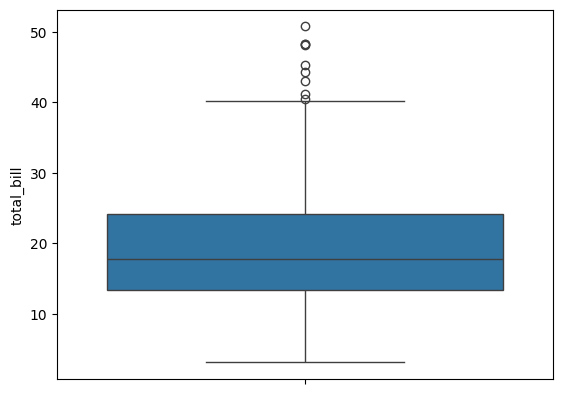

In [ ]:
sns.boxplot(df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

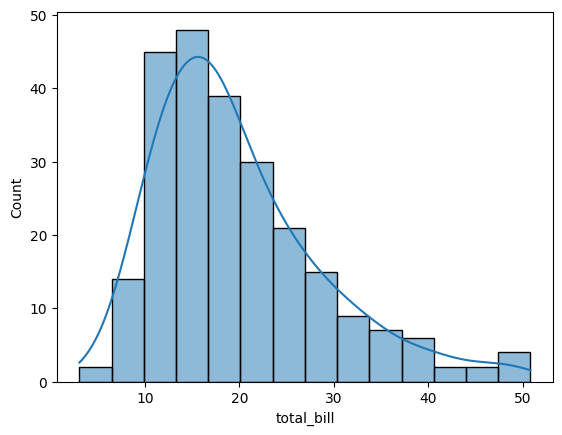

In [ ]:
sns.histplot(df['total_bill'],kde=True)

In [ ]:
df1=sns.load_dataset('iris')

In [ ]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='sepal_length', ylabel='Count'>

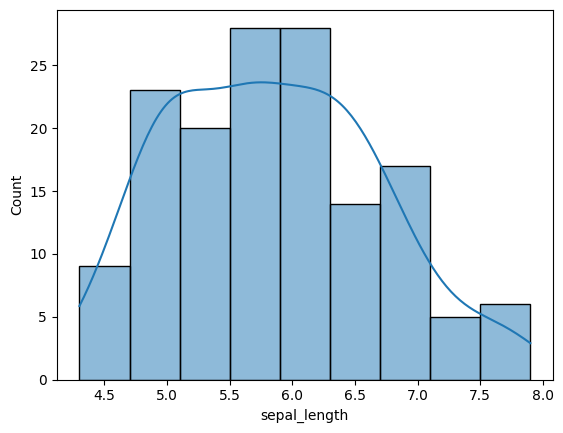

In [ ]:
sns.histplot(df1['sepal_length'],kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

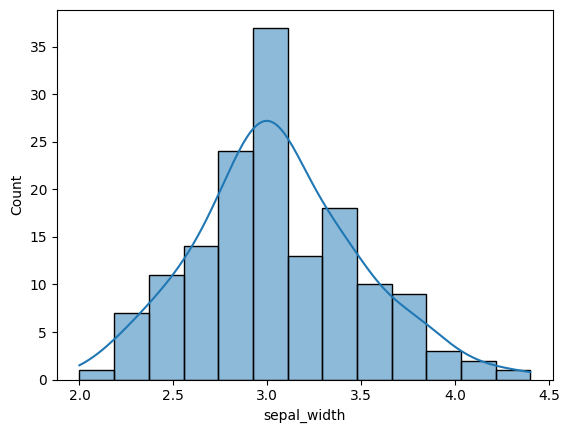

In [ ]:
sns.histplot(df1['sepal_width'],kde=True) #Normal distributed

<ipython-input-29-5e3d97cbad40>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df1['species'],palette='rainbow')


<Axes: xlabel='count', ylabel='species'>

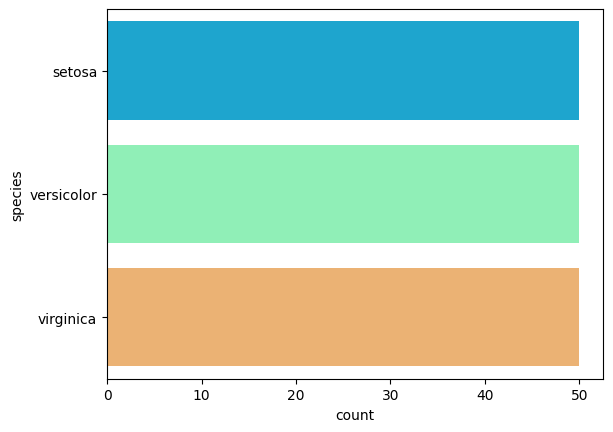

In [ ]:
sns.countplot(df1['species'],palette='rainbow' )

In [ ]:
np.percentile(df1['sepal_length'],[25])

array([5.1])

##**Detect - Outliers**
#dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

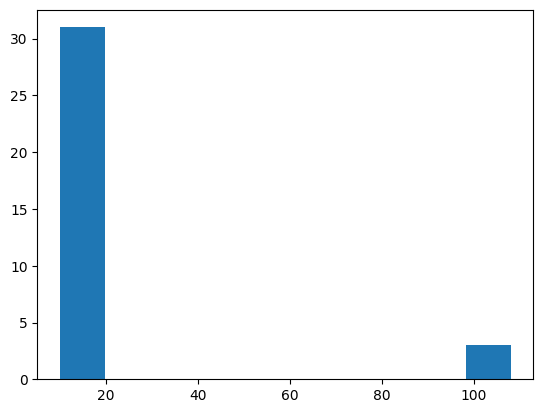

In [ ]:
plt.hist(dataset)

In [ ]:
#Z-Score
outliers=[]

def detect_outliers(data):
  threshold=3 # std of 3
  mean=np.mean(data)
  std=np.std(data)

  for i in data:
    z_score=(i-mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(i)

  return outliers

In [ ]:
detect_outliers(dataset)

[102, 107, 108]

In [ ]:
#IQR implementation

dataset=sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [ ]:
q1,q3=np.percentile(dataset,[25,75])
print(q1,q3)

12.0 15.0


In [ ]:
iqr=q3-q1
print(iqr)

3.0


In [ ]:
lower_fench=(q1-1.5*iqr)
higher_fench=(q3+1.5*iqr)
print(lower_fench,higher_fench)

7.5 19.5


In [ ]:
filtered_dataset=[x for x in dataset if lower_fench <= x <= higher_fench]

In [ ]:
#filtered_dataset=[]
#for x in dataset:
 # if x >=lower_fench and x<=higher_fench:
  #  filtered_dataset.append(x)

In [ ]:
filtered_dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19]

In [ ]:
import seaborn as sns

<Axes: >

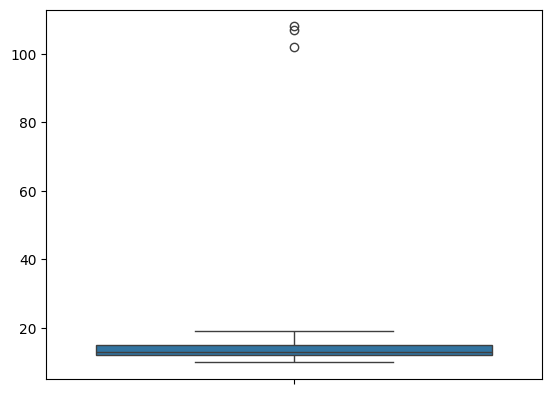

In [ ]:
sns.boxplot(dataset)

<Axes: >

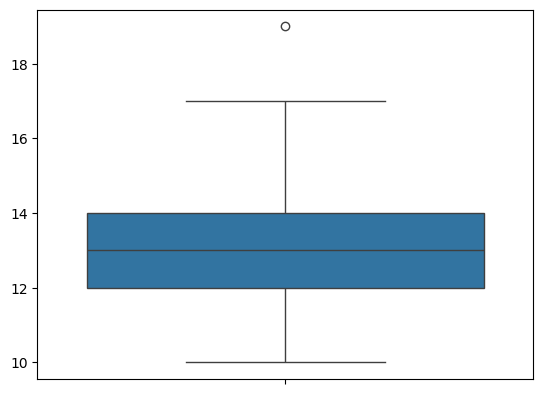

In [ ]:
sns.boxplot(filtered_dataset)

LIve stats

**bold text**
# **Z-Test**

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99, 105, 109, 109, 109, 110, 112, 112, 113, 114, 115]
ztest(data,value=100)

(1.5976240527147705, 0.1101266701438426)

#**T-Test**

In [ ]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [ ]:
import numpy as np
ages_mean=np.mean(ages)
ages_mean

30.34375

In [ ]:
sample_size=10
age_sample=np.random.choice(ages,sample_size)

In [ ]:
age_sample

array([28, 14, 24, 32, 17, 20, 20, 14, 18, 17])

In [ ]:
from scipy.stats import ttest_1samp
ttest_1samp(age_sample,30)

TtestResult(statistic=-5.120050568650402, pvalue=0.0006279357493457116, df=9)

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1000)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=50)

In [ ]:
classA_ages.mean()

47.72

In [ ]:
school_ages.mean()

53.226

In [ ]:
ttest_1samp(classA_ages,popmean=46)

TtestResult(statistic=1.8821324564631972, pvalue=0.0657637841516016, df=49)

In [ ]:
import seaborn as sns
df=sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


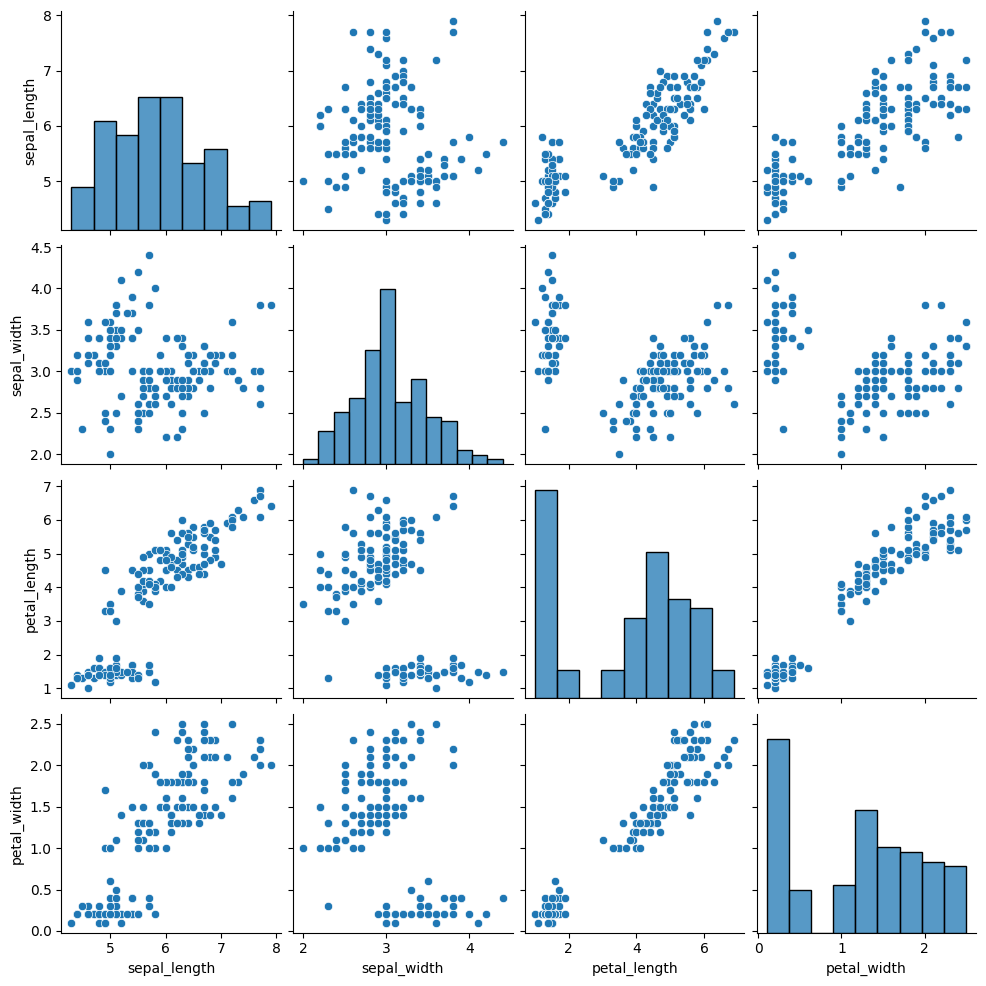

In [ ]:
sns.pairplot(numeric_df)